**Importing necessary libraries**

In [9]:
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import joblib
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the data from our dataset**

In [10]:
data= pd.read_csv('general_data.csv')



In [11]:
data



,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1,Y,11,8,0,1,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0,Y,23,8,1,6,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1,Y,15,8,3,5,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3,Y,11,8,3,13,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4,Y,12,8,2,9,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3,Y,17,8,1,10,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,Y,15,8,0,10,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0,Y,20,8,0,5,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0,Y,14,8,1,10,2,9,7,8


In [ ]:
# Data Cleaning: Handling Null values

In [12]:
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

**DATA VISUALIZATION**

**COUNT PLOT FOR Attrition**

Text(0, 0.5, 'Count')

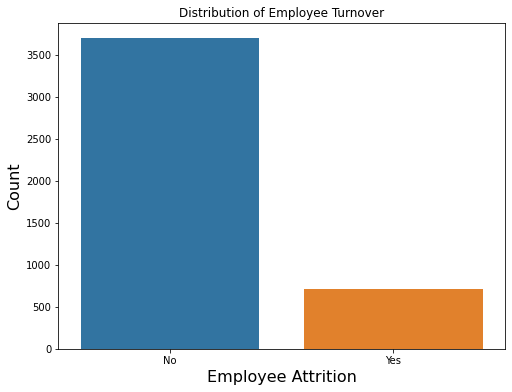

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x='Attrition',data=data)
plt.title('Distribution of Employee Turnover')
plt.xlabel('Employee Attrition', fontsize=16)
plt.ylabel('Count', fontsize=16)


**INSIGHTS**
We can clearly see that Dataset in Imbalanced(84% No , 16% Yes).


**DISTRIBUTION PLOT for Age**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


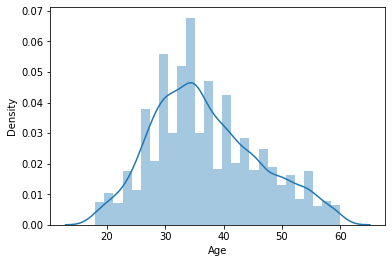

In [15]:
sns.distplot(data['Age']);


**INSIGHTS**
Age is fairly normally distributed with average Age around 35. Most of the employees in the range 25 to 45

**DISTRIBUTION PLOT for Monthly Income**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


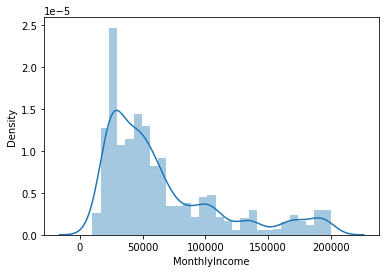

In [16]:
sns.distplot(data['MonthlyIncome']);

**INSIGHTS**
Most the employees have their monthly income around 5000$ and is distribution Rightly Skewed.

**STRIP PLOT for BusinessTravel vs Age having hue** (Categorized based on) as Attrition

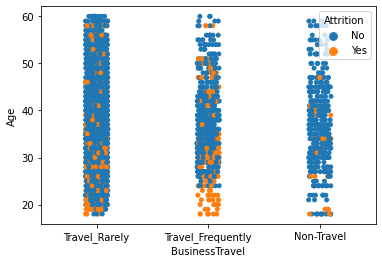

In [17]:
sns.stripplot(x='BusinessTravel',y='Age',data=data,hue='Attrition');

**INSIGHTS**
The above stripplot categorizes the attrition of the people based on business Travel and plots the datas of people with attrition in blue and people with no attrition in orange.

**SWARMPLOT for Attrition vs MonthlyIncome**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 74.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 34.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


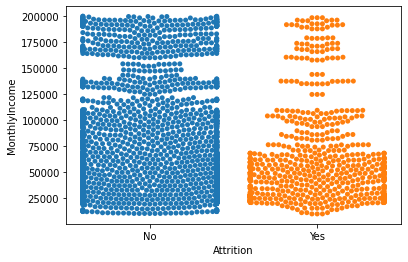

In [18]:
sns.swarmplot(x='Attrition',y='MonthlyIncome',data=data);

**INSIGHTS**
A swarmplot shows all the data points and that helps to understand the distribution in a better manner. From the above plot we can understand how the data is distributed across a categorical attribute(Attrition) and how the continuous variable(MonthlyRate) is varying within a category(Yes or No).

**VIOLIN PLOT for EducationField vs YearsAtCompany have hue** (categorized based on) as Attrition

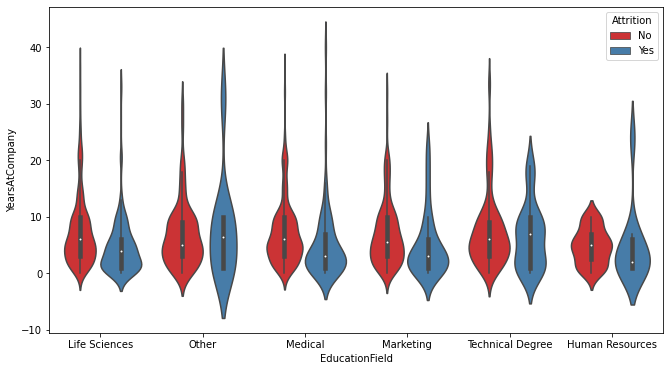

In [19]:
plt.figure(figsize=(11,6))
sns.violinplot(x='EducationField', y="YearsAtCompany", data=data,hue='Attrition',split=False,palette='Set1');

**INSIGHTS**
The above violin plot shows the attritions of people based on Educationfield and helps us to know the densities of the people with attrition value Yes and No having education field as independent variable and years at company as dependent variable.

**Kernel Density Estimate (KDE) PLOTS**

In [20]:
def kdePlot(var):
    fig = plt.figure(figsize=(15,4))
    ax=sns.kdeplot(data.loc[(data['Attrition'] == 'No'),var] , color='b',shade=True,label='no Attrition') 
    ax=sns.kdeplot(data.loc[(data['Attrition'] == 'Yes'),var] , color='r',shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))

In [21]:
numerical_df=data.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(numerical_df.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeID','NumCompaniesWorked',
'PercentSalaryHike','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsSinceLastPromotion']
for l in remove_columns:
    numeric_cols_kdeplot.remove(l)

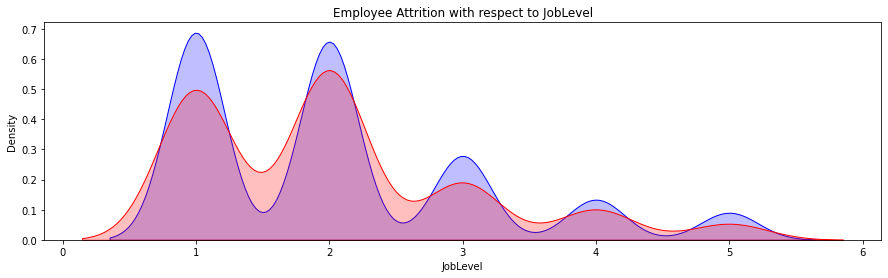

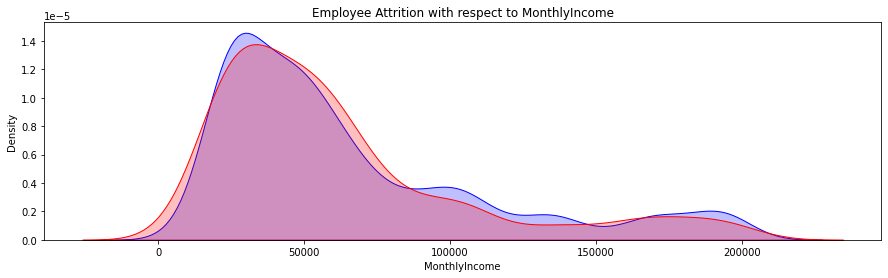

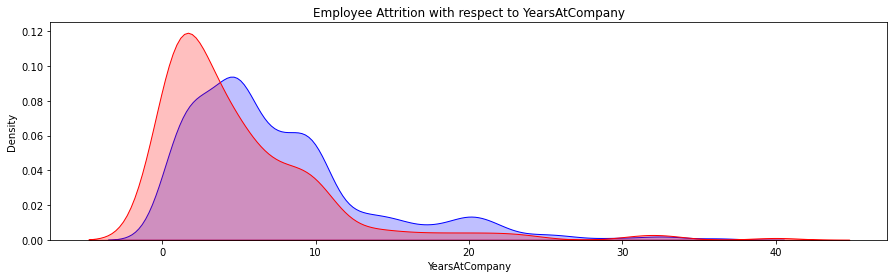

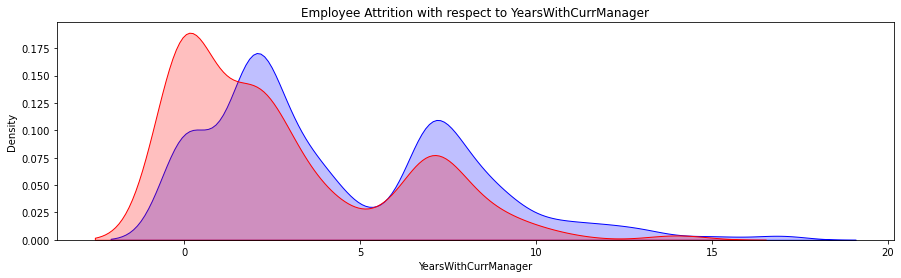

In [22]:
for n in numeric_cols_kdeplot:
    kdePlot(n)

**INSIGHTS**
From the above graphs we find that,

Attrition is high with Employees having joblevel as 1.

Employees whose monthly income is below $5000 have high attrition.

Employees who worked in the company around 0 to 1 years have high attrition.

Employees who are in current role for around 0 to 4 years have high attrition

**BARPLOTS**

In [23]:
BarPlot_columns=['Age','DistanceFromHome','EducationField','JobLevel','JobRole','TotalWorkingYears','TrainingTimesLastYear']

In [24]:
def Bar_plots(var):
    col=pd.crosstab(data[var],data.Attrition)
    col.div(col.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(8,4))
    plt.xticks(rotation=90)

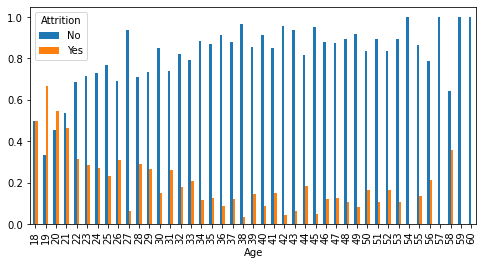

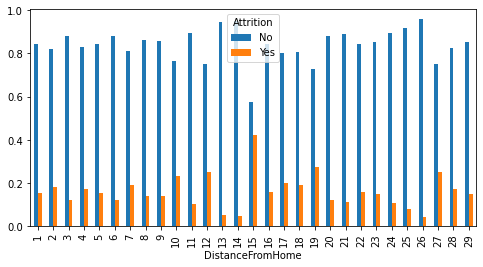

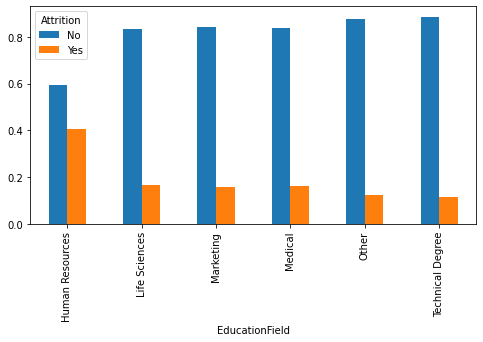

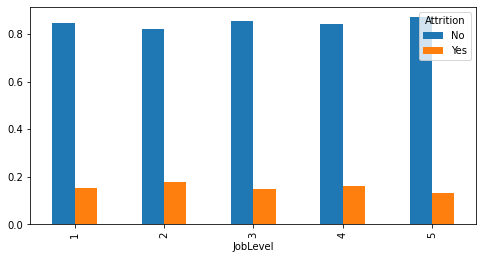

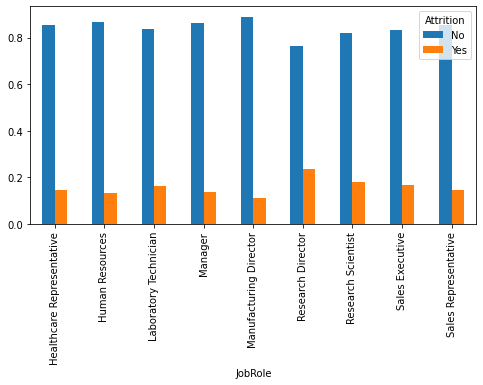

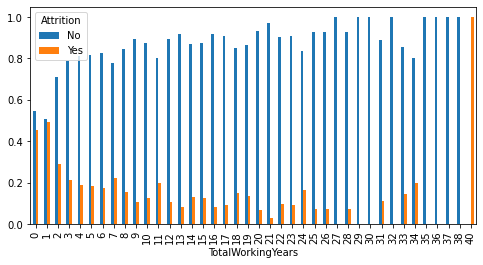

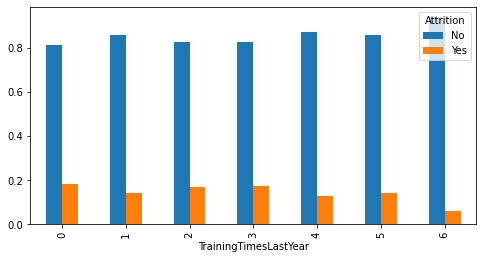

In [25]:
for col in BarPlot_columns:
    Bar_plots(col)

**INSIGHTS**
From the above graphs we find that,

Attrition is very high with employees having age in between 18 to 22.

Attrition is more when the distance of office is more from home

Attrition is high with employee's education in the field of Human Resources, Marketing and Technical Degree that other fields

Attrition is high with employee's whose job role is in the field of Human Resources, Sales Representative, Laboratory Technician.

Employees who work over time have high attrition than employees who did not do over time

Employees who are working less than 2 years have more attrition

**From the above visualizations we see that 'EmployeeID','EmployeeCount','Over18','StockOptionLevel' do not help in building our model so dropping those columns.**

In [27]:
data.drop(['EmployeeID','EmployeeCount','Over18','StockOptionLevel'],axis=1,inplace=True)

data.drop_duplicates(inplace=True)

In [28]:
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1,11,8,1,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0,23,8,6,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1,15,8,5,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3,11,8,13,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4,12,8,9,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,28,Yes,Travel_Rarely,Human Resources,1,3,Medical,Female,2,Laboratory Technician,Married,24130,1,16,8,5,2,1,0,0
3910,41,No,Non-Travel,Sales,2,2,Medical,Male,2,Research Scientist,Married,107980,5,14,8,10,5,3,1,2
4226,36,No,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,2,Sales Representative,Married,43200,5,17,8,5,2,1,0,0
4395,40,No,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,1,Manufacturing Director,Divorced,27180,5,14,8,9,4,9,4,7


In [29]:
X = data.drop('Attrition', inplace=False, axis=1)
y = data.Attrition

In [30]:
X

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1,11,8,1,6,1,0,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0,23,8,6,3,5,1,4
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1,15,8,5,2,5,0,3
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3,11,8,13,5,8,7,5
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4,12,8,9,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,28,Travel_Rarely,Human Resources,1,3,Medical,Female,2,Laboratory Technician,Married,24130,1,16,8,5,2,1,0,0
3910,41,Non-Travel,Sales,2,2,Medical,Male,2,Research Scientist,Married,107980,5,14,8,10,5,3,1,2
4226,36,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,2,Sales Representative,Married,43200,5,17,8,5,2,1,0,0
4395,40,Travel_Rarely,Research & Development,2,3,Life Sciences,Male,1,Manufacturing Director,Divorced,27180,5,14,8,9,4,9,4,7


In [31]:
y

0        No
1       Yes
2        No
3        No
4        No
       ... 
3818    Yes
3910     No
4226     No
4395     No
4409     No
Name: Attrition, Length: 1496, dtype: object

One Hot Encoding (Using Dummy Variables)

Performing Column Transfer

Training Using RandomForestClassifier and LGBMClassifier

Then applying Voting Classifier on these two models to find the aggregate 

In [32]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

ct = make_column_transformer((ohe, make_column_selector(dtype_include='object')),
                            remainder='passthrough')


rnd = RandomForestClassifier(n_estimators=500,min_samples_split=80,min_samples_leaf=2,
                             max_features='log2',max_depth=8,random_state=42)

lgbm = LGBMClassifier(random_state=42)

vc = VotingClassifier(estimators=[('rnd', rnd), ('lgbm', lgbm)],voting='soft', n_jobs=-1)

pipe = make_pipeline(ct,vc)

pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc3f1186d90>)])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('rnd',
                                               RandomForestClassifier(max_depth=8,
                                                                      max_features='log2',
                                                                      min_samples_leaf=2,
                                                                      min_samples_split=80,
                                                                      n_estimator

**Splitting the dataset into the Training set and Test set**

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [36]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fc3f1186d90>)])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('rnd',
                                               RandomForestClassifier(max_depth=8,
                                                                      max_features='log2',
                                                                      min_samples_leaf=2,
                                                                      min_samples_split=80,
                                                                      n_estimator

**Using K Fold cross validation to measure accuracy of our Logistic Regression model**

In [39]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(pipe,X,y,cv=cv)

array([0.83666667, 0.81666667, 0.85333333, 0.84      , 0.84      ])

**Predicting the Test set results**

In [40]:
pred=pipe.predict(x_test)

In [41]:
np.array(y_test)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No',

In [43]:
pred

array(['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No'

**Checking the ACCURACY of our model**

In [44]:
cm = confusion_matrix(y_test, pred)
print("CONFUSION MATRIX\n",cm)
print("\nCLASSIFICATION REPORT\n",classification_report(y_test,pred))
print("\nACCURACY SCORE : ",accuracy_score(y_test, pred))

CONFUSION MATRIX
 [[239   7]
 [ 51   3]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

          No       0.82      0.97      0.89       246
         Yes       0.30      0.06      0.09        54

    accuracy                           0.81       300
   macro avg       0.56      0.51      0.49       300
weighted avg       0.73      0.81      0.75       300


ACCURACY SCORE :  0.8066666666666666


ACCURACY OF THE MODEL IS 80.67%